# practicalMixGaussB

The goal of this part of the lab is to fit a mixture of gaussians model to some one-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

You should use this template for your code and fill in the missing 
sections marked "TO DO."

PLEASE NOTE (again): You should NOT be using functions like multivariate_normal.pdf and normfit or any other numpy functions for fitting your distributions in this or further parts of this practical. Optionally, you can try comparing your results to those produced by those functions, but our goal here is to learn what is happening!

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our grounf truth mixture of $k$ Gaussians model. We will represent the mixtures of Gaussians as a python dictionary. Not that we are working in one dimension, but if we were to require $d$ dimenisions, the mean field would be a $d \times k$ matrix and the cov field would be a $d \times d \times k$ matrix. 

In [2]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 2 # number of gaussians
mixGaussTrue['d'] = 1 # dimension of the data
mixGaussTrue['weight'] = np.array([0.3, 0.7]) # weight assigned to each gaussian
mixGaussTrue['mean'] = np.array([[-1,1.5]]) # the mean for each gaussian 
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2)) # the covariance for each gaussian

**getGaussProb**, **sampleFromDiscrete**, and **drawEMData1d** are helper functions. 

In [3]:
# subroutine to return gaussian probabilities
def getGaussProb(x,mean,var):   
    """
    Returns the likelihood that each data point in x belongs to the Gaussian described by mean and 
    var.
    
    Keyword arguments:
    x -- 1 by n vector of data points. n is the number of data points.
    mean -- scalar containing the mean parameter of the Gaussian distribution.
    var -- scalar containing the variance parameter of the Gaussian distribution.
    
    Returns: 
    prob -- scalar containing the likelihood that each data point in data belongs to the Gaussian 
    distribution defined by mean and var.
    """
    mean = np.squeeze(mean)
    var = np.squeeze(var)
    prob = np.exp(-0.5*((x-mean)**2)/(var))
    prob = prob/ np.sqrt(2*np.pi*var) 
    return prob

In [4]:
def sampleFromDiscrete(probDist): 
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """

    nIndex = len(probDist)
    while True:
        #choose random index 
        r=int(np.floor(np.random.uniform()*nIndex)) 
        #choose random height
        randHeight = np.random.uniform()
        #if height is less than probability value at this point in the
        # histogram then select 
        if randHeight<probDist[r]: 
            break
    return r 

In [5]:
def drawEMData1d(data, mixGauss):
    """
    Draw the data, data, in histogram form and plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- 1 by n vector of data points.
    mixGauss -- dict with mixture of gaussian information.

    """
    # delete previous plot if it exists 
    # hold off;
    # bin the data to make a histogram
                                                                                                          
    binWidth = 0.1
    binMin = -4.0
    binMax = 4.0
    nSteps = int(np.ceil((binMax - binMin) / binWidth))
                                                                                                          
    nDims, nData = data.shape
                                                                                                          
    xHist = np.linspace(binMin, binMax, nSteps, endpoint=True)
    xHistExt = np.append(xHist, np.inf) 
    yHist, _ = np.histogram(data, xHistExt)
                                                                                                          
    yHist = yHist / (nData * binWidth)
    plt.cla()
    plt.bar(xHist, yHist, binWidth, edgecolor='b') 
                                                                                                          
    # calculate Gaussian data
    nGauss = mixGauss['k']
    gaussEnvEst = np.zeros(xHist.shape)
    for cGauss in range(nGauss):
        # calculate weighted Gaussian values
        gaussProb = mixGauss['weight'][cGauss] * getGaussProb(xHist, mixGauss['mean'][:,cGauss],          
                                                              mixGauss['cov'][:, :, cGauss])              
        plt.plot(xHist, gaussProb, 'm-')  # weighted components of MoG                                    
        # add to form envelope                                                                            
        gaussEnvEst = gaussEnvEst + gaussProb 
                                                                                                          
    plt.plot(xHist, gaussEnvEst, 'g-')  # final mixture of Gaussians                                      
                                                                                                          
    # tidy up plot                                                                                        
    plt.xlabel('Data Value')                                                                              
    plt.ylabel('Probability Density')                                                                     
    # set(gca,'Box','Off');                                                                               
    # set(gcf,'Color',[1 1 1]);                                                                           
    plt.xlim((binMin, binMax))                                                                            
    plt.ylim((0, max(yHist) * 1.5))                                                                       
                                                                                                          
    return                                                                                                
    

**TODO HERE:**

Complete the TO DO in this function before moving on. 



In [6]:
def mixGaussGen1d(mixGauss, nData):  
    """
    Generates data from a one-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- 1 by nData, generated data points. 
    """
    
    # create space for output data                                                                               
    data = np.zeros(shape=(1, nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])                                                               
        # draw a sample from the appropriate Gaussian distribution                                               
        
        # TO DO (d)- replace this 
        # We first get the mean of the selected Gaussian component
        mean = mixGauss['mean'][0, h]
        # We then get the covariance of the Gaussian component
        # Here we have two gaussian components, and h represents the index of the gaussian component (0 for the first Gaussian and 1 for the second)
        covariance = mixGauss['cov'][0, 0, h]
        
        # Draw a sample from the selected Gaussian distribution
        data[0, cData] = mean + np.sqrt(covariance) * np.random.randn()
                                                                                                         
    return data                                                                                                  

With all the helper functions complete, we can now generate and plot some points from our model. The blue bars are the histogram of the generated points. The green curve is what the complete mixture of gaussians model looks like. The pink curves are the component gaussians. 

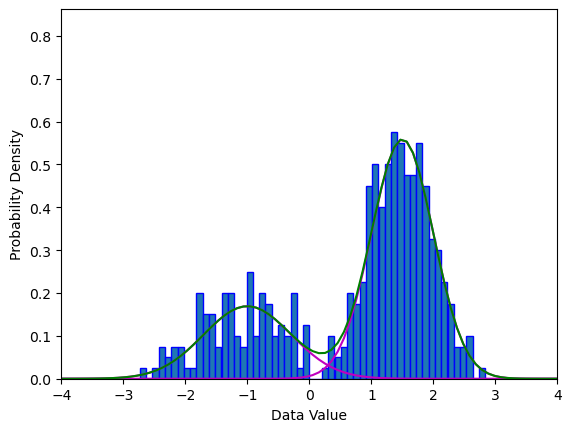

In [7]:
# define number of samples to generate
nData = 400

#generate data from the mixture of Gaussians
#make sure you've filled out the todo above! 
data = mixGaussGen1d(mixGaussTrue,nData)

#plot! 
fig,ax = plt.subplots(1,1)
drawEMData1d(data,mixGaussTrue)

### Figure analysis:
The plot shown above displays a Mixture of two one dimensional Gaussians. The continuous curves show the theoretical probability distribution of the two Gaussians seperately as well as the mixture of Gaussians (MoG). We have generated 400 samples from this (MoG) using the functions we have completed, and we can see that it is roughly distributed as the theory predicts, which shows that we've correctly implemented the function and matches my expectations. 

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO HERE:** 

Fill out the missing parts below. 

In [8]:
def getMixGaussBound(data, mixGaussEst, responsibilities):                                                  
    """
    Calculate the bound on the log likelihood for the whole data set under a mixture of Gaussians model.  
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict 
    aining the mixture of gaussians parameters.
    responsibilities -- k by n vector containing the responsibility of this data point for each Gaussian. 
    
    Returns: 
    bound -- scalar containing the bound on the log likelihood.
    
    """
    # find total number of data items  
    nDims, nData = data.shape

    # initialize bound
    bound = 0

    # I've defined here the covariance, weight and mean to make the for loop more readable
    curCov = mixGaussEst['cov']
    curWeight = mixGaussEst['weight']
    curMean = mixGaussEst['mean']

    # run through each data item 
    for cData in range(nData):
        # extract this data
        thisData = data[:, cData]
        # extract this q(h)
        thisQ = responsibilities[:, cData]


        boundValue = 0

        # We loop over each component of the MoG
        for cGauss in range(mixGaussEst['k']):
            mean = curMean[:, cGauss]
            cov = curCov[:, :, cGauss]
            weight = curWeight[cGauss]
            q_nk = thisQ[cGauss] # This is the responsibility of the current Gaussian component for the current data point

            # The if statement is to ensure numerical stability (we don't want to divide by or take the log of 0)
            if q_nk > 0:
                # Update the lower bound value
                prob = getGaussProb(thisData, mean, cov)
                boundValue += q_nk * np.log((weight * prob) / q_nk)
        bound += boundValue
    return np.array(bound).item()


**TODO HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision. 

In [9]:
def getMixGaussLogLike(data, mixGaussEst):
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of Gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    """
    data = np.atleast_2d(data)
    # find total number of data items  
    nDims, nData = data.shape

    # initialize log likelihoods  
    logLike = 0

    # Similarly to before, we define the covariance, weight and mean
    curWeight = mixGaussEst['weight']
    curMean = mixGaussEst['mean']
    curCov = mixGaussEst['cov']

    # run through each data item
    for cData in range(nData):
        thisData = data[:, cData]
        like = 0
        # We loop over each Gaussian component 
        for cGauss in range(mixGaussEst['k']):
            # We get the weight, mean and covariancefor the current Gaussian component
            weight = curWeight[cGauss]
            mean = curMean[:, cGauss]
            cov = curCov[:, :, cGauss]
            gaussProb = getGaussProb(thisData, mean, cov)
            # We calculate the likelihood
            like += weight * gaussProb
        logLike += np.log(like)
    return np.array(logLike).item()     
                                                                                                       

**TODO HERE:** 

Fill out the missing parts below. 

In [10]:
def fitMixGauss1d(data, k):   
    """
    Estimate a k-component MoG model that fits the data. Incrementally plots the outcome.
                   
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of Gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    # MAIN E-M ROUTINE  
    # In the E-M algorithm, we calculate a complete posterior distribution over                                  
    # the (nData) hidden variables in the E-Step.  
    # In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    
    nDims, nData = data.shape                                                                                        
                                                                                                                     
    responsibilities = np.zeros(shape=(k, nData))                                                                    
                                                                                                                     
    # we will initialize the values to random values                                                                 
    mixGaussEst = dict()                                                                                             
    mixGaussEst['d'] = 1                                                                                             
    mixGaussEst['k'] = k                                                                                             
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))                                                             
    mixGaussEst['mean'] = 2 * np.random.randn(1, k)                                                                  
    mixGaussEst['cov'] = 0.1 + 1.5 * np.random.uniform(size=(1,1,k))                                                   
                                                                                                                     
    # calculate current likelihood                                                                                   
    logLike = getMixGaussLogLike(data, mixGaussEst)                                                                  
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))                                                       
                                                                                                                     
    nIter = 20                                                                                                    
                                                                                                                     
    logLikeVec = np.zeros(shape=(2 * nIter))                                                                         
    boundVec = np.zeros(shape=(2 * nIter)) 
        
    fig, ax = plt.subplots(1, 1)
                                                                                                                     
    for cIter in range(nIter):                                                                                          
                                                                                                                     
        # ===================== =====================                                                                
        # Expectation Step                                                                                           
        # ===================== =====================                                                                
        curCov = mixGaussEst['cov']                                                                                  
        curWeight = mixGaussEst['weight']                                                                            
        curMean = mixGaussEst['mean']                                                                                
        for cData in range(nData):           
            thisData = data[:, cData]  
            # Calculate the posterior probability that this data point came from each of the Gaussians
            # Compute the numerator of the responsibilities
            numerators = np.zeros(k)
            for cGauss in range(k):
                weight = curWeight[cGauss]
                mean = curMean[:, cGauss]
                cov = curCov[:, :, cGauss]
                # We compute the Gaussian probability density function
                gaussProb = getGaussProb(thisData, mean, cov)
                numerators[cGauss] = weight * gaussProb
            # We normalise to get the responsibilities
            denominator = np.sum(numerators)
            responsibilities[:, cData] = numerators / denominator if denominator != 0 else numerators
                                                                                                                     
        # calculate the log likelihood                                                                               
        logLike = getMixGaussLogLike(data, mixGaussEst)                                                              
        print('Log Likelihood After E-Step Iter {} : {:4.3f}\n'.format(cIter, logLike))                              
                                                                                                                     
        # calculate the bound                                                                                        
        bound = getMixGaussBound(data, mixGaussEst, responsibilities)                                                
        print('Bound After E-Step Iter {} : {:4.3f}\n'.format(cIter, bound))     
            
        logLikeVec[2 * cIter] = logLike                                                                              
        boundVec[2 * cIter] = bound                                                                                  
        # ===================== =====================                                                                
        # Maximization Step                                                                                          
        # ===================== =====================                                                                
        # Update the parameters based on the responsibilities
        # Maximization Step
        N_k = np.sum(responsibilities, axis=1)
        mixGaussEst['weight'] = N_k / nData
        for cGauss in range(k):
            # We update the means
            weighted_sum = np.sum(responsibilities[cGauss, :] * data, axis=1)
            mixGaussEst['mean'][:, cGauss] = weighted_sum / N_k[cGauss]
            # We update the covariances
            diff = data - mixGaussEst['mean'][:, cGauss][:, np.newaxis]
            weighted_sq_diff = responsibilities[cGauss, :] * (diff ** 2)
            mixGaussEst['cov'][:, :, cGauss] = np.sum(weighted_sq_diff, axis=1).reshape(1, 1) / N_k[cGauss]
                                                                                                                     
        # Draw the new solution  
        drawEMData1d(data, mixGaussEst)
        time.sleep(0.7)
        fig.canvas.draw()
                                                                                                                     
        # Calculate the log likelihood                                                                               
        logLike = getMixGaussLogLike(data, mixGaussEst)                                                              
        print('Log Likelihood After M-Step Iter {} : {:4.3f}\n'.format(cIter, logLike))                              
                                                                                                                     
        # Calculate the bound                                                                                        
        bound = getMixGaussBound(data, mixGaussEst, responsibilities)                                                
        print('Bound After M-Step Iter {} : {:4.3f}\n'.format(cIter, bound)) 
                                                                                                                      
        logLikeVec[2 * cIter + 1] = logLike                                                                          
        boundVec[2 * cIter + 1] = bound                                                                              
                                                                                                                     
    plt.figure()                                                                                                     
    plt.plot(logLikeVec, 'g', label='log likelihood')                                                                                        
    plt.plot(boundVec, 'r', label='lower bound')  
    plt.legend()
                                                                                                                     
    return mixGaussEst
                                                                                               

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

Log Likelihood Iter 0 : -763.493

Log Likelihood After E-Step Iter 0 : -763.493

Bound After E-Step Iter 0 : -763.493

Log Likelihood After M-Step Iter 0 : -604.174

Bound After M-Step Iter 0 : -614.467

Log Likelihood After E-Step Iter 1 : -604.174

Bound After E-Step Iter 1 : -604.174

Log Likelihood After M-Step Iter 1 : -590.271

Bound After M-Step Iter 1 : -596.595

Log Likelihood After E-Step Iter 2 : -590.271

Bound After E-Step Iter 2 : -590.271

Log Likelihood After M-Step Iter 2 : -578.900

Bound After M-Step Iter 2 : -584.153

Log Likelihood After E-Step Iter 3 : -578.900

Bound After E-Step Iter 3 : -578.900

Log Likelihood After M-Step Iter 3 : -571.120

Bound After M-Step Iter 3 : -574.398

Log Likelihood After E-Step Iter 4 : -571.120

Bound After E-Step Iter 4 : -571.120

Log Likelihood After M-Step Iter 4 : -567.313

Bound After M-Step Iter 4 : -568.780

Log Likelihood After E-Step Iter 5 : -567.313

Bound After E-Step Iter 5 : -567.313

Log Likelihood After M-Step Ite

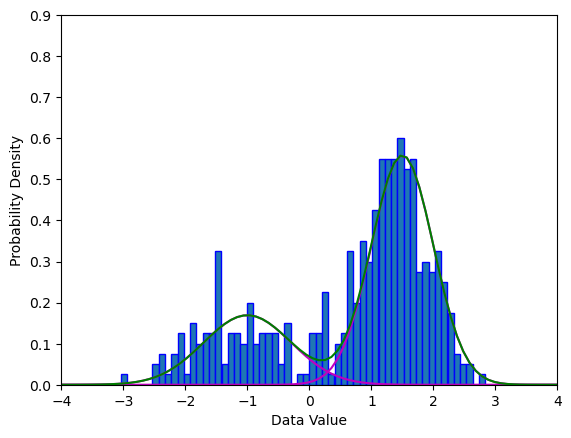

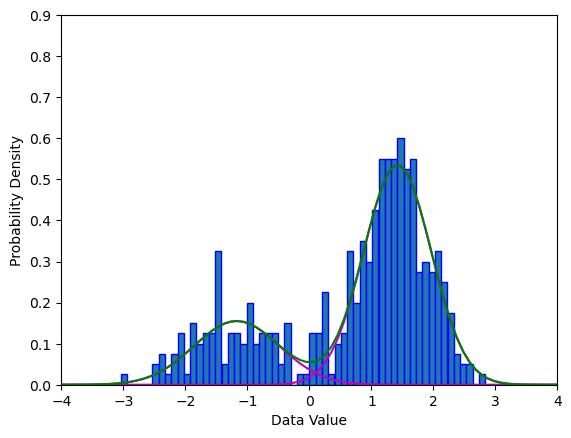

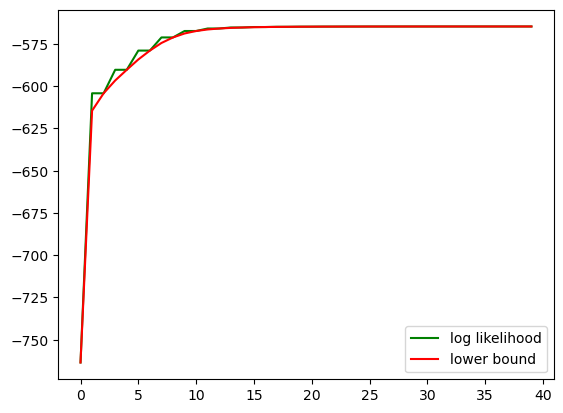

In [11]:
#generate data from the ground truth mixture of Gaussians we've defined way above. 
#make sure you've completed this routine above.
data = mixGaussGen1d(mixGaussTrue,nData)

#draw data, ground truth mixture of Gaussians.
drawEMData1d(data,mixGaussTrue)

#define number of components to estimate
nGaussEst = 2

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
#Make sure you've completed this routine above.
mixGaussEst = fitMixGauss1d(data,nGaussEst)

## Figure analysis:

### Figure 1: 

The first figure is very similar to the one earlier in the notebook. We generated 400 data points from the ground truth MoG using the mixGaussGen1d function and plotted it, resulting in our samples roughly following the ground truth MoG probability distribution. This is what we wanted and expected. 

### Figure 2: 

The second figure shows how we have fitted a mixture of Gaussians model on our data. Looking at the two first graphs, we see that the continous curves are almost identical, showing that the MoG with have approximated with the EM algorithm is very close to the ground truth (if we look carefully, we can see that tehy are not quite the same). This suggests that our algorithm was successful and implemented correctly. 

### Figure 3: 

The third and last figure shows how the ELBO (Evidence Lower BOund) and the log likelihood change throughout the iterations of the EM algorithm. This graphs shows us three things:

- The first is that the log likelihood always increases and advances towards the maximum, which is what we would expect.
- The second is that the log likelihood never goes below the ELBO curve.
- The third is the step-like structure of the the log-likelihood, which shows the E and M steps in action.